# Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from pycaret.classification import *
from pyfiglet import Figlet
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features import RadViz
import datetime
import time

In [2]:
f = Figlet(width=100)
print(f.renderText("Notebook made by\nVitor R. G. Gomes\n2022\n"))

 _   _       _       _                 _                          _        _           
| \ | | ___ | |_ ___| |__   ___   ___ | | __  _ __ ___   __ _  __| | ___  | |__  _   _ 
|  \| |/ _ \| __/ _ \ '_ \ / _ \ / _ \| |/ / | '_ ` _ \ / _` |/ _` |/ _ \ | '_ \| | | |
| |\  | (_) | ||  __/ |_) | (_) | (_) |   <  | | | | | | (_| | (_| |  __/ | |_) | |_| |
|_| \_|\___/ \__\___|_.__/ \___/ \___/|_|\_\ |_| |_| |_|\__,_|\__,_|\___| |_.__/ \__, |
                                                                                 |___/ 
__     ___ _               ____       ____      ____                           
\ \   / (_) |_ ___  _ __  |  _ \     / ___|    / ___| ___  _ __ ___   ___  ___ 
 \ \ / /| | __/ _ \| '__| | |_) |   | |  _    | |  _ / _ \| '_ ` _ \ / _ \/ __|
  \ V / | | || (_) | |    |  _ < _  | |_| |_  | |_| | (_) | | | | | |  __/\__ \
   \_/  |_|\__\___/|_|    |_| \_(_)  \____(_)  \____|\___/|_| |_| |_|\___||___/
                                                                        

# Tipos de Eclipse Lunar

Os eclipses da Lua só podem ocorrer durante a fase de Lua Cheia. É então possível que a Lua passe através das sombras penumbrais ou umbrais da Terra, produzindo assim um eclipse. Existem três tipos de eclipses lunares:

Penumbral - A Lua atravessa a sombra penumbral da Terra (a Lua perde a sombra umbral da Terra)

Parcial - A Lua atravessa as sombras penumbrais e umbrais da Terra (a Lua não passa completamente para o umbra da Terra)

Total - A Lua atravessa as sombras penumbrais e umbrais da Terra (a Lua passa completamente para o umbra da Terra)

## Os eclipses totais podem ser ainda classificados como centrais ou não centrais:

Central - Parte da Lua passa diretamente através do centro da sombra umbral da Terra.
Estes são os tipos mais profundos e longos de eclipses lunares.

Não-Central - A Lua passa completamente dentro da sombra umbral da Terra, mas não passa pelo centro da sombra umbral.

### Fonte
https://eclipse.gsfc.nasa.gov/LEcat5/LE-1299--1200.html

# Legenda da classificação do Eclipse Lunar do dataset

## Classificação do Eclipse onde:

- N = Eclipse Lunar Penumbral.

- P = Eclipse Lunar Parcial (em umbra).

- T = Eclipse Lunar Total (em umbra).
    

## Segundo caractere na Classificação do Eclipse:

- "m" = Eclipse do meio da série de Saros.

- "+" = Eclipse total central. (O centro da Lua passa ao norte do eixo das sombras).

- "-" = eclipse total central (O centro da Lua passa ao sul do eixo das sombras).

- "*" = eclipse lunar penumbral total.

- "b" = Começa a série de Saros (primeiro eclipse penumbral em série).

- "e" = A série de Saros termina (último eclipse penumbral em série).
  
### Fonte
https://eclipse.gsfc.nasa.gov/LEcat5/LEcatkey.html

# Importação dos dados de Eclipses Lunares

In [3]:
dfLunar = pd.read_csv("datasets/lunar.csv")
dfLunar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Gamma,Penumbral Magnitude,Umbral Magnitude,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
0,1,-1999 June 26,14:13:28,46437,-49456,17,N,t-,-1.0981,0.8791,-0.1922,24S,22W,268.8,-,-
1,2,-1999 November 21,20:23:49,46427,-49451,-16,N,-a,-1.1155,0.8143,-0.1921,15N,98W,233.4,-,-
2,3,-1998 May 17,05:47:36,46416,-49445,-11,P,-t,0.8988,1.2105,0.2069,13S,89E,281.7,102.7,-
3,4,-1998 November 11,05:15:58,46404,-49439,-6,P,-a,-0.4644,2.0382,0.9740,12N,113E,343.4,200.8,-
4,5,-1997 May 6,18:57:01,46392,-49433,-1,T+,pp,0.1003,2.6513,1.6963,11S,92W,322.8,213.5,98.2


# Exploração dos Dados e Pré-Processamento (Eclipse Lunar)

In [4]:
dfLunar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Catalog Number                  12064 non-null  int64  
 1   Calendar Date                   12064 non-null  object 
 2   Eclipse Time                    12064 non-null  object 
 3   Delta T (s)                     12064 non-null  int64  
 4   Lunation Number                 12064 non-null  int64  
 5   Saros Number                    12064 non-null  int64  
 6   Eclipse Type                    12064 non-null  object 
 7   Quincena Solar Eclipse          12064 non-null  object 
 8   Gamma                           12064 non-null  float64
 9   Penumbral Magnitude             12064 non-null  float64
 10  Umbral Magnitude                12064 non-null  float64
 11  Latitude                        12064 non-null  object 
 12  Longitude                       

In [5]:
dfLunar.isnull().values.any()

False

In [6]:
dfLunar.describe()

,Catalog Number,Delta T (s),Lunation Number,Saros Number,Gamma,Penumbral Magnitude,Umbral Magnitude,Penumbral Eclipse Duration (m)
count,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000
mean,6032.500000,12116.476044,-18531.392822,80.505056,0.002490,1.418656,0.400175,269.971941
std,3482.721158,13584.785584,17887.218741,48.416007,0.910505,0.832263,0.832954,79.945444
min,1.000000,-6.000000,-49456.000000,-20.000000,-1.582700,0.000400,-1.095800,5.200000
25%,3016.750000,962.000000,-33923.250000,40.000000,-0.788825,0.684425,-0.334000,223.100000
50%,6032.500000,5597.000000,-18445.500000,80.000000,0.001750,1.417450,0.400450,295.000000
75%,9048.250000,20901.500000,-3067.750000,121.000000,0.791725,2.136900,1.117925,327.800000
max,12064.000000,46437.000000,12378.000000,183.000000,1.579100,2.908900,1.882100,379.500000


In [7]:
dfLunar.drop(["Delta T (s)", "Gamma"], axis=1, inplace=True)
dfLunar.head()

,Catalog Number,Calendar Date,Eclipse Time,Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Penumbral Magnitude,Umbral Magnitude,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
0,1,-1999 June 26,14:13:28,-49456,17,N,t-,0.8791,-0.1922,24S,22W,268.8,-,-
1,2,-1999 November 21,20:23:49,-49451,-16,N,-a,0.8143,-0.1921,15N,98W,233.4,-,-
2,3,-1998 May 17,05:47:36,-49445,-11,P,-t,1.2105,0.2069,13S,89E,281.7,102.7,-
3,4,-1998 November 11,05:15:58,-49439,-6,P,-a,2.0382,0.9740,12N,113E,343.4,200.8,-
4,5,-1997 May 6,18:57:01,-49433,-1,T+,pp,2.6513,1.6963,11S,92W,322.8,213.5,98.2


Abaixo estou verificando os tipos de Eclipses que os dados contêm, bem como as Quincenas

O parâmetro Quincena Solar Eclipse identifica o tipo de eclipse solar que precede e/ou sucede um eclipse lunar.

In [8]:
print(dfLunar["Eclipse Type"].unique())
print(dfLunar["Quincena Solar Eclipse"].unique())

#Convertendo os campos únicos em uma série de números para poder verificar suas correlaçãoes com o resto dos dados
dfLunar["Eclipse Type"] = pd.factorize(dfLunar["Eclipse Type"])[0] + 1
dfLunar["Quincena Solar Eclipse"] = (
    pd.factorize(dfLunar["Quincena Solar Eclipse"])[0] + 1
)
dfLunar.head()

['N' 'P' 'T+' 'T-' 'T' 'Nx' 'Ne' 'Nb']
['t-' '-a' '-t' 'pp' 'a-' 'p-' 'h-' '-p' '-h' 'tp' 'pt']


,Catalog Number,Calendar Date,Eclipse Time,Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Penumbral Magnitude,Umbral Magnitude,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m)
0,1,-1999 June 26,14:13:28,-49456,17,1,1,0.8791,-0.1922,24S,22W,268.8,-,-
1,2,-1999 November 21,20:23:49,-49451,-16,1,2,0.8143,-0.1921,15N,98W,233.4,-,-
2,3,-1998 May 17,05:47:36,-49445,-11,2,3,1.2105,0.2069,13S,89E,281.7,102.7,-
3,4,-1998 November 11,05:15:58,-49439,-6,2,2,2.0382,0.9740,12N,113E,343.4,200.8,-
4,5,-1997 May 6,18:57:01,-49433,-1,3,4,2.6513,1.6963,11S,92W,322.8,213.5,98.2


Abaixo estou fazendo a tratativa de dados para a Duração dos Eclipses, convertendo os dados de string para float (em minutos) 

In [9]:
dfLunar2 = dfLunar
dfLunar2["Partial Eclipse Duration (m)"].str.contains("-")

0         True
1         True
2        False
3        False
4        False
         ...  
12059    False
12060    False
12061     True
12062     True
12063     True
Name: Partial Eclipse Duration (m), Length: 12064, dtype: bool

In [10]:
dfLunar3 = dfLunar2["Partial Eclipse Duration (m)"]
dfLunar3.replace("-", np.nan, inplace=True)
dfLunar3 = dfLunar3.astype(float)
val = dfLunar3.mean(axis=0, skipna=True)
print(val)

174.76808482956025


In [11]:
dfLunar2["Partial Eclipse Duration (m)"].replace(np.nan, val, inplace=True)
dfLunar2["Partial Eclipse Duration (m)"] = pd.to_numeric(
    dfLunar2["Partial Eclipse Duration (m)"]
)

In [12]:
dfLunar3 = dfLunar2["Total Eclipse Duration (m)"]
dfLunar3.replace("-", np.nan, inplace=True)
dfLunar3 = dfLunar3.astype(float)
val = dfLunar3.mean(axis=0, skipna=True)
print(val)
dfLunar2["Total Eclipse Duration (m)"].replace(np.nan, val, inplace=True)
dfLunar2["Total Eclipse Duration (m)"] = pd.to_numeric(
    dfLunar2["Total Eclipse Duration (m)"]
)

80.82428858867489


In [13]:
dfLunar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Catalog Number                  12064 non-null  int64  
 1   Calendar Date                   12064 non-null  object 
 2   Eclipse Time                    12064 non-null  object 
 3   Lunation Number                 12064 non-null  int64  
 4   Saros Number                    12064 non-null  int64  
 5   Eclipse Type                    12064 non-null  int64  
 6   Quincena Solar Eclipse          12064 non-null  int64  
 7   Penumbral Magnitude             12064 non-null  float64
 8   Umbral Magnitude                12064 non-null  float64
 9   Latitude                        12064 non-null  object 
 10  Longitude                       12064 non-null  object 
 11  Penumbral Eclipse Duration (m)  12064 non-null  float64
 12  Partial Eclipse Duration (m)    

Realizando conversões nos dados de Datas, para transformar de String pra DateTime para ver a correlação com o restante dos dados

In [14]:
dfLunar2["Calendar Date"] = dfLunar2["Calendar Date"].str.replace("-", "")
dfLunar2["Eclipse Datetime"] = (
    dfLunar2["Calendar Date"] + " " + dfLunar2["Eclipse Time"]
)
dfLunar2.head()

,Catalog Number,Calendar Date,Eclipse Time,Lunation Number,Saros Number,Eclipse Type,Quincena Solar Eclipse,Penumbral Magnitude,Umbral Magnitude,Latitude,Longitude,Penumbral Eclipse Duration (m),Partial Eclipse Duration (m),Total Eclipse Duration (m),Eclipse Datetime
0,1,1999 June 26,14:13:28,-49456,17,1,1,0.8791,-0.1922,24S,22W,268.8,174.768085,80.824289,1999 June 26 14:13:28
1,2,1999 November 21,20:23:49,-49451,-16,1,2,0.8143,-0.1921,15N,98W,233.4,174.768085,80.824289,1999 November 21 20:23:49
2,3,1998 May 17,05:47:36,-49445,-11,2,3,1.2105,0.2069,13S,89E,281.7,102.700000,80.824289,1998 May 17 05:47:36
3,4,1998 November 11,05:15:58,-49439,-6,2,2,2.0382,0.9740,12N,113E,343.4,200.800000,80.824289,1998 November 11 05:15:58
4,5,1997 May 6,18:57:01,-49433,-1,3,4,2.6513,1.6963,11S,92W,322.8,213.500000,98.200000,1997 May 6 18:57:01


In [15]:
dfLunar2["Eclipse Datetime"] = pd.to_datetime(
    dfLunar2["Eclipse Datetime"], errors="coerce"
)
dfLunar2["Eclipse Datetime"] = pd.to_numeric(
    dfLunar2["Eclipse Datetime"], errors="coerce"
)
dfLunar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Catalog Number                  12064 non-null  int64  
 1   Calendar Date                   12064 non-null  object 
 2   Eclipse Time                    12064 non-null  object 
 3   Lunation Number                 12064 non-null  int64  
 4   Saros Number                    12064 non-null  int64  
 5   Eclipse Type                    12064 non-null  int64  
 6   Quincena Solar Eclipse          12064 non-null  int64  
 7   Penumbral Magnitude             12064 non-null  float64
 8   Umbral Magnitude                12064 non-null  float64
 9   Latitude                        12064 non-null  object 
 10  Longitude                       12064 non-null  object 
 11  Penumbral Eclipse Duration (m)  12064 non-null  float64
 12  Partial Eclipse Duration (m)    

Como pode ser observado abaixo, a grande maioria das transformações feitas não possuem correlação forte com o restante dos dados e portanto, podem ser descartadas

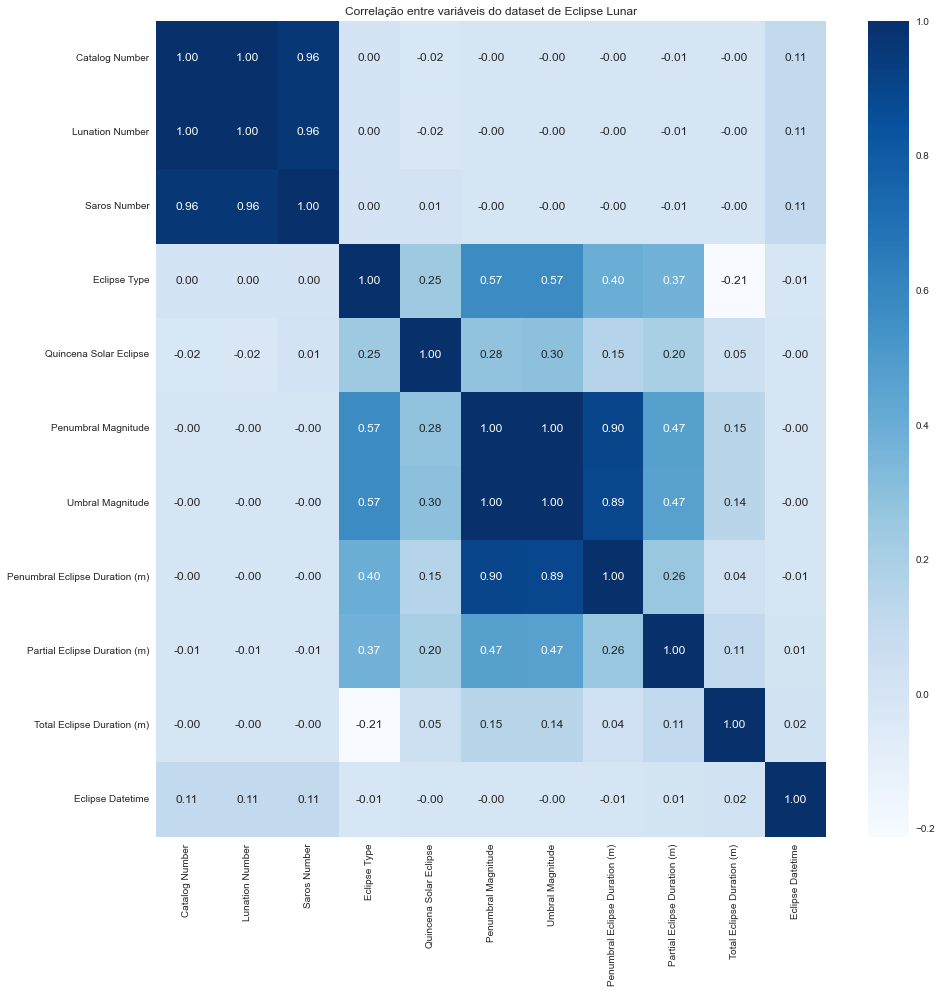

In [16]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    dfLunar2.corr(),  # .corr() traz a correlação de Pearson, mostrando um relacionamento linear entre as variáveis
    annot=True,
    fmt=".2f",
    cmap="Blues",
)
plt.title("Correlação entre variáveis do dataset de Eclipse Lunar")
plt.show()

In [17]:
dfLunar2.drop(
    [
        "Calendar Date",
        "Eclipse Time",
        "Latitude",
        "Longitude",
        "Eclipse Datetime",
        "Partial Eclipse Duration (m)",
        "Total Eclipse Duration (m)",
        "Quincena Solar Eclipse",
    ],
    axis=1,
    inplace=True,
)

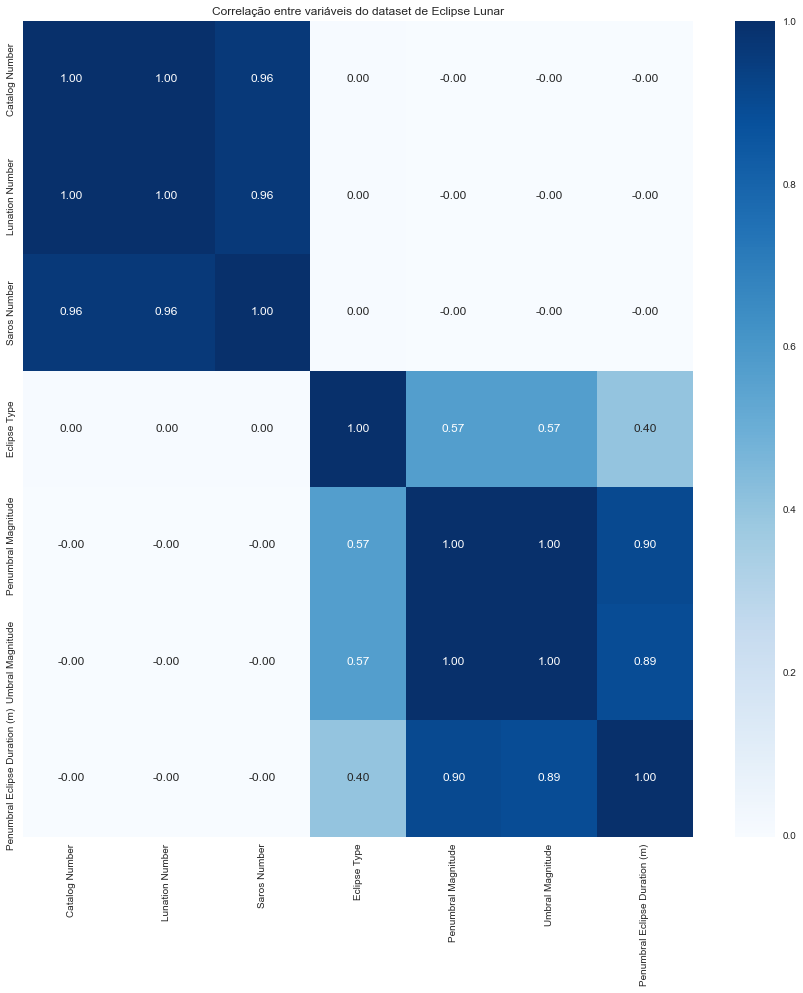

In [18]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    dfLunar2.corr(),  # .corr() traz a correlação de Pearson, mostrando um relacionamento linear entre as variáveis
    annot=True,
    fmt=".2f",
    cmap="Blues",
)
plt.title("Correlação entre variáveis do dataset de Eclipse Lunar")
plt.show()

# Busca por Outliers (Lunar)

In [19]:
dfLunar2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12064 entries, 0 to 12063
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Catalog Number                  12064 non-null  int64  
 1   Lunation Number                 12064 non-null  int64  
 2   Saros Number                    12064 non-null  int64  
 3   Eclipse Type                    12064 non-null  int64  
 4   Penumbral Magnitude             12064 non-null  float64
 5   Umbral Magnitude                12064 non-null  float64
 6   Penumbral Eclipse Duration (m)  12064 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 659.9 KB


<AxesSubplot:xlabel='Eclipse Type', ylabel='Penumbral Eclipse Duration (m)'>

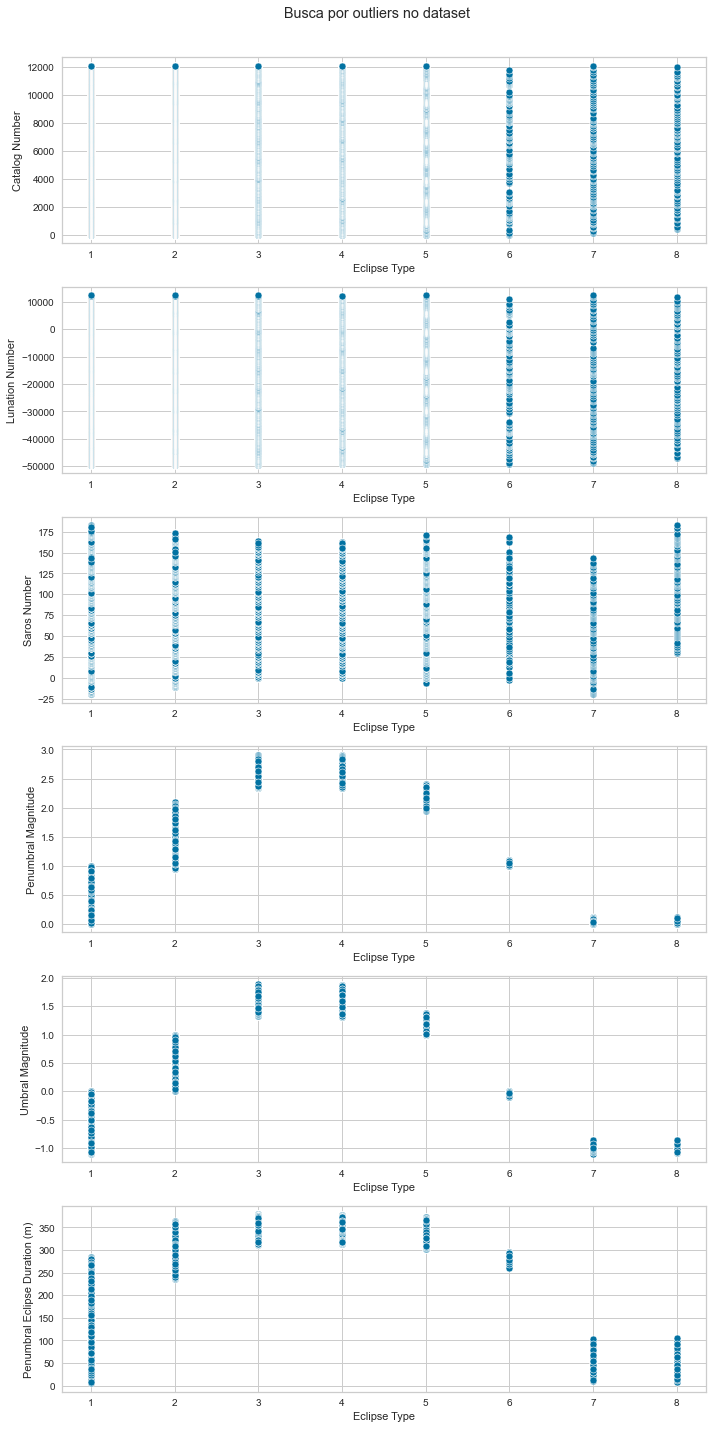

In [20]:
fig, axes = plt.subplots(6, 1, figsize=(10, 20))

fig.suptitle("Busca por outliers no dataset", va="bottom")
fig.tight_layout(pad=2.0)

sns.scatterplot(ax=axes[0], data=dfLunar2, x="Eclipse Type", y="Catalog Number")
sns.scatterplot(ax=axes[1], data=dfLunar2, x="Eclipse Type", y="Lunation Number")
sns.scatterplot(ax=axes[2], data=dfLunar2, x="Eclipse Type", y="Saros Number")
sns.scatterplot(ax=axes[3], data=dfLunar2, x="Eclipse Type", y="Penumbral Magnitude")
sns.scatterplot(ax=axes[4], data=dfLunar2, x="Eclipse Type", y="Umbral Magnitude")
sns.scatterplot(
    ax=axes[5], data=dfLunar2, x="Eclipse Type", y="Penumbral Eclipse Duration (m)"
)

# Criação de Modelos de Machine Learning e Análise dos Resultados iniciais

In [21]:
model = GaussianNB()
model2 = KNeighborsClassifier(n_neighbors=10)

In [22]:
dfLunar3 = dfLunar2.drop(["Catalog Number","Lunation Number","Saros Number","Penumbral Eclipse Duration (m)"], axis=1)
dfLunar3.shape

(12064, 3)

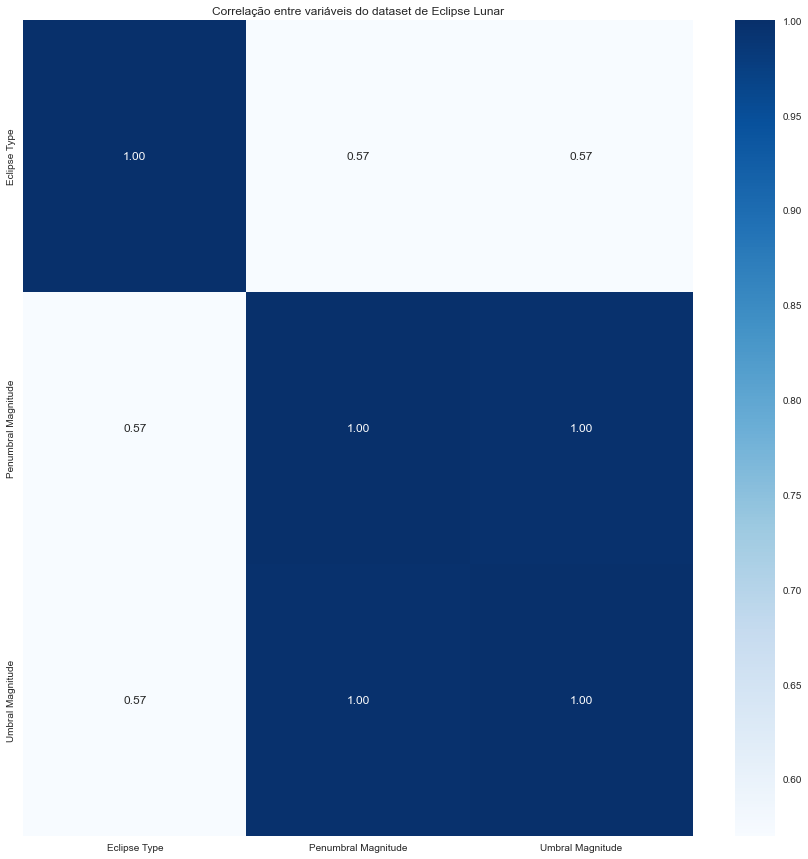

In [23]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    dfLunar3.corr(),  # .corr() traz a correlação de Pearson, mostrando um relacionamento linear entre as variáveis
    annot=True,
    fmt=".2f",
    cmap="Blues",
)
plt.title("Correlação entre variáveis do dataset de Eclipse Lunar")
plt.show()

In [113]:
X = dfLunar3.drop(["Eclipse Type"], axis=1)
y = dfLunar3["Eclipse Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [114]:
X_test.head()

,Penumbral Magnitude,Umbral Magnitude
5092,2.5618,1.4727
10172,1.8260,0.7870
5003,2.7532,1.6715
5952,2.7327,1.6627
10431,2.0679,1.0898


In [115]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8604972375690608

In [116]:
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.8906077348066298

# Análise com Pycaret em busca do melhor modelo possível para o Eclipse Lunar

In [117]:
s = setup(dfLunar3, target="Eclipse Type", remove_perfect_collinearity=False)

,Description,Value
0,session_id,7288
1,Target,Eclipse Type
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(12064, 3)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [118]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8969,0.9914,0.6999,0.8950,0.8955,0.8604,0.8605,0.1240
dt,Decision Tree Classifier,0.8966,0.9425,0.7113,0.8962,0.8961,0.8603,0.8604,0.0060
et,Extra Trees Classifier,0.8966,0.9908,0.6995,0.8953,0.8956,0.8602,0.8602,0.0880
gbc,Gradient Boosting Classifier,0.8960,0.9915,0.6857,0.8947,0.8950,0.8594,0.8594,0.9980
knn,K Neighbors Classifier,0.8940,0.9865,0.6838,0.8919,0.8923,0.8565,0.8566,0.0130
lightgbm,Light Gradient Boosting Machine,0.8934,0.9914,0.6898,0.8917,0.8917,0.8557,0.8558,0.1560
qda,Quadratic Discriminant Analysis,0.8857,0.9913,0.6420,0.8762,0.8798,0.8450,0.8454,0.0050
lr,Logistic Regression,0.8656,0.9901,0.4794,0.8297,0.8451,0.8156,0.8170,0.1540
nb,Naive Bayes,0.8614,0.9901,0.7100,0.8771,0.8668,0.8152,0.8160,0.0040
lda,Linear Discriminant Analysis,0.8481,0.9900,0.4872,0.8293,0.8309,0.7932,0.7954,0.0060


In [119]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

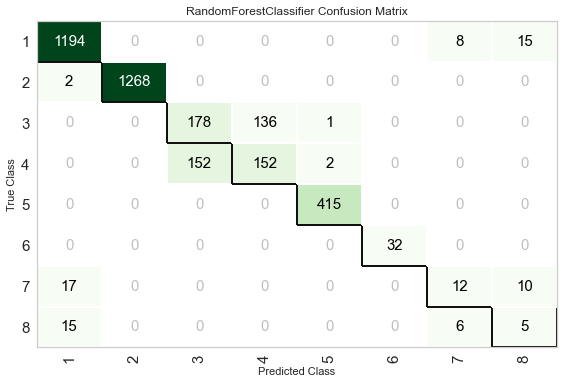

In [120]:
plot_model(best, plot="confusion_matrix")

In [121]:
predictions = predict_model(best, data=dfLunar3, raw_score=True)
predictions.head()

,Eclipse Type,Penumbral Magnitude,Umbral Magnitude,Label,Score_0,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7
0,1,0.8791,-0.1922,1,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
1,1,0.8143,-0.1921,1,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
2,2,1.2105,0.2069,2,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,2,2.0382,0.9740,2,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,3,2.6513,1.6963,3,0.0,0.0,0.67,0.33,0.0,0.0,0.0,0.0


In [128]:
print("Score do melhor modelo encontrado:", best.score(X_test, y_test))
y_pred = best.predict(X_test)
print(classification_report(y_test, y_pred))

Score do melhor modelo encontrado: 0.9718232044198895
              precision    recall  f1-score   support

           1       0.99      1.00      0.99      1206
           2       1.00      1.00      1.00      1257
           3       0.84      0.89      0.86       296
           4       0.89      0.84      0.87       320
           5       1.00      1.00      1.00       435
           6       1.00      1.00      1.00        36
           7       0.94      0.87      0.90        38
           8       0.80      0.75      0.77        32

    accuracy                           0.97      3620
   macro avg       0.93      0.92      0.92      3620
weighted avg       0.97      0.97      0.97      3620



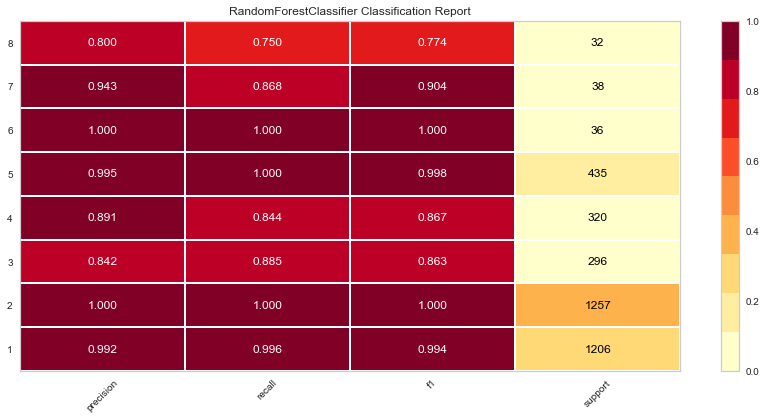

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [123]:
visualizer = ClassificationReport(
    best, classes=["0", "1", "2", "3", "4", "5", "6", "7", "8"], support=True
)
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Sine and cosine waves")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)


visualizer.show()

# Validação Cruzada

In [135]:
scores = cross_val_score(model2, X, y, cv=10)  # variável com número de validações cv

print("Scores obtidos:", scores)
print("Média de Score:", scores.mean())

Scores obtidos: [0.91052196 0.89560895 0.88069594 0.89146645 0.90049751 0.90049751
 0.89883914 0.89800995 0.88308458 0.88557214]
Média de Score: 0.8944794118334041


In [134]:
scores = cross_val_score(best, X, y, cv=10)  # variável com número de validações cv

print("Scores obtidos:", scores)
print("Média de Score:", scores.mean())

Scores obtidos: [0.90389395 0.90969345 0.89643745 0.89726595 0.90547264 0.91293532
 0.9013267  0.90215589 0.89303483 0.89303483]
Média de Score: 0.9015251002650377


# Conclusão para o modelo de Eclipses Lunares

Para a etapa de exploração e pré-processamento, fiz uma verificação inicial dos possíveis problemas: Valores nulos em algum lugar do DataFrame, dados não normalizados, dados uplicados, Variáveis categóricas, correlação baixa entre os dados e outliers. 

Destes problemas,encontrei que havia algumas conversões de dados para serem feitas, como String para Float e String para DateTime, com o objetivo de verificar as correlações destes dados com os demais,onde a correlação destes dados convertidos se mostraram baixas e portanto, os dados foram removidos do modelo de treinamento. Além disso, também verifiquei que os dados de classificação estavam em formato de String, então serializei a classificação do dataset e fiz com que as informações fossem classificadas como números inteiros, onde cada número está atrelado a uma classificação única dos dados

Sabendo que o problema era de classificação, explorei os modelos KNN e Naive Bayer, sem uso de hiperparâmetros neles, definido o número de K-vizinhos como 5 também. O algoritmo Naive Bayer teve um score de 0.86, enquanto o KNN 0.89.

Em estudos passados sobre Machine Learning, vi que alguns estavam usando uma biblioteca chamada PyCaret e fui atrás da documentação dela pra implementar aqui. Se trata de uma biblioteca que automatiza testes com diversos modelos e encontra o melhor com seus hiperparâmetros já definidos em pouco tempo(Para este dataset, questão de 10seg mais ou menos), meu objetivo aqui no caso seria tentar subir ainda mais o score, utilizando outros algoritmos. De todos os analisados pela biblioteca, foi retornado o Random Forest Classifier como sendo o de maior score, plotei sua Matriz de confusão e o Report de Classificação para ver se não estava dando nenhum caso de Overfitting e aparentemente ficou estável, tendo um score final de 0.971.

Por fim, adotei o método de validação cruzada, usando 10 iterações para ser um pouco mais rigoroso com os dados e comparando tanto o KNN que fiz sua implementação manualmente quanto a sugestão do PyCaret, onde foi obtido o resultado de que realmente o algoritmo do PyCaret é ligeiramente mais eficiente nos resultados, tendo uma média de Score em 0.9015, enquanto o KNN teve 0.8944, pouco menos de 1% a menos de média.

# Tipos de Eclipses Solares

Os eclipses do Sol só podem ocorrer quando a Lua está próxima de um de seus dois nós orbitais durante a fase da Lua Nova. É então possível que as sombras penumbrais, umbrais ou antumbrais da Lua varram a superfície da Terra, produzindo assim um eclipse. Existem quatro tipos de eclipses solares:

Parciais - a sombra penumbral da Lua atravessa a Terra (sombras umbrais e antumbrais falham completamente a Terra).

Anular - A sombra antumbral da Lua atravessa a Terra (a Lua está muito longe da Terra para cobrir completamente o Sol)

Total - A sombra umbral da Lua atravessa a Terra (a Lua está suficientemente perto da Terra para cobrir completamente o Sol)

Híbrido - As sombras umbrais e antumbrais da Lua atravessam a Terra (o eclipse aparece anular e total ao longo de diferentes seções de seu trajeto). Os eclipses híbridos também são conhecidos como eclipses anulares-totais.

Os eclipses totais são visíveis de dentro da sombra umbral da Lua, enquanto os eclipses anulares são vistos dentro da sombra antumbral. 

## Estes eclipses podem ser classificados como centrais ou não centrais como:

Central (dois limites) - O eixo central do cone de sombra da Lua atravessa a Terra produzindo assim uma linha central na trilha do eclipse. O umbra ou antumbra cai inteiramente sobre a Terra, de modo que a trilha terrestre tem um limite norte e sul.

Central (um limite) - O eixo central do cone de sombra da Lua atravessa a Terra. Entretanto, uma porção do umbra ou antumbra falha a Terra durante todo o eclipse e a trilha terrestre resultante tem apenas um limite.

Não-Central (um limite) - O eixo central do cone de sombra da Lua falha a Terra. Entretanto, uma borda do umbra ou antumbra grava a Terra, produzindo assim uma trilha terrestre com um limite e sem linha central.

### Fonte
https://eclipse.gsfc.nasa.gov/SEcat5/SE-1299--1200.html

# Legenda da classificação do Eclipse Solar do dataset

## Classificação do Eclipse onde:

- P = Eclipse Parcial.

- A = Eclipse Anular.

- T = Eclipse total.

- H = Eclipse Híbrido ou Anular/Total.

## Segundo caractere na Classificação do Eclipse:
- "m" = eclipse do meio da série de Saros.

- "n" = Eclipse central sem limite norte.

- "s" = Eclipse central sem limite sul.

- "+" = Eclipse não central sem limite norte.

- "-" = Eclipse não central, sem limite sul.

- "2" = Caminho híbrido começa total e termina anular.

- "3" = Caminho híbrido começa anular e termina total.

- "b" = Começa a série de Saros (primeiro eclipse em série).

- "e" = a série de Saros termina (último eclipse em série).

### Fonte
https://eclipse.gsfc.nasa.gov/SEcat5/SEcatkey.html

# Importação dos dados de Eclipses Solares

In [137]:
dfSolar = pd.read_csv("datasets/solar.csv")
dfSolar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247,06m37s
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236,06m44s
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111,02m15s
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162,01m14s
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,NaN,NaN


# Exploração dos Dados e Pré-Processamento (Eclipse Solar)

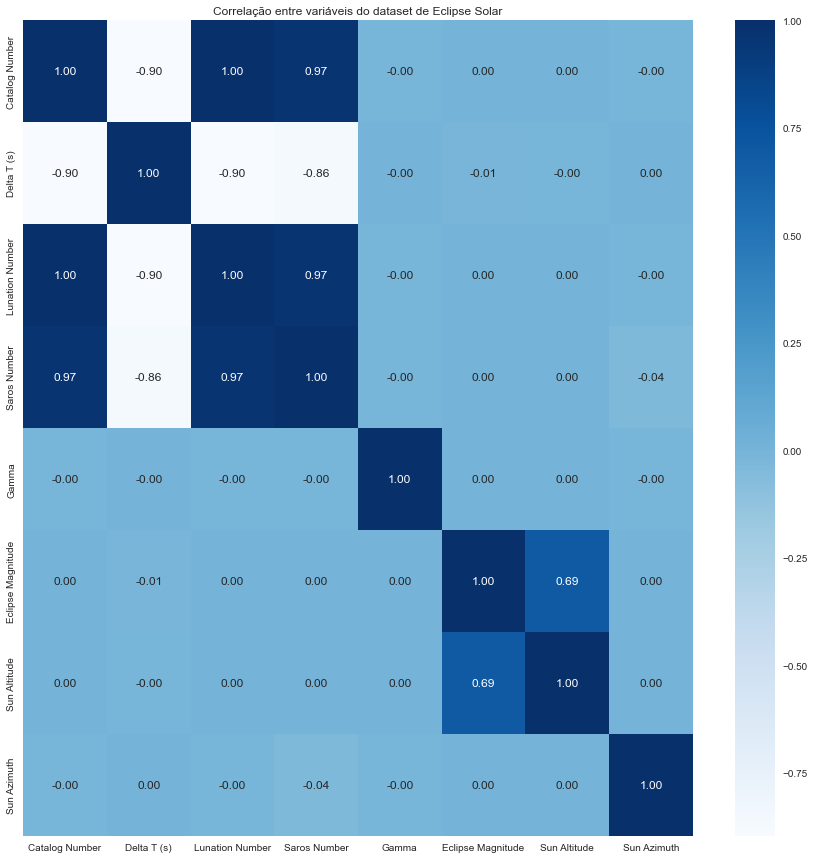

In [138]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    dfSolar.corr(),  # .corr() traz a correlação de Pearson, mostrando um relacionamento linear entre as variáveis
    annot=True,
    fmt=".2f",
    cmap="Blues",
)
plt.title("Correlação entre variáveis do dataset de Eclipse Solar")
plt.show()

In [139]:
dfSolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Catalog Number     11898 non-null  int64  
 1   Calendar Date      11898 non-null  object 
 2   Eclipse Time       11898 non-null  object 
 3   Delta T (s)        11898 non-null  int64  
 4   Lunation Number    11898 non-null  int64  
 5   Saros Number       11898 non-null  int64  
 6   Eclipse Type       11898 non-null  object 
 7   Gamma              11898 non-null  float64
 8   Eclipse Magnitude  11898 non-null  float64
 9   Latitude           11898 non-null  object 
 10  Longitude          11898 non-null  object 
 11  Sun Altitude       11898 non-null  int64  
 12  Sun Azimuth        11898 non-null  int64  
 13  Path Width (km)    7698 non-null   object 
 14  Central Duration   7698 non-null   object 
dtypes: float64(2), int64(6), object(7)
memory usage: 1.4+ MB


In [140]:
dfSolar["Central Duration"] = pd.to_timedelta(
    dfSolar["Central Duration"], errors="coerce"
) / np.timedelta64(1, "s")
dfSolar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11898 entries, 0 to 11897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Catalog Number     11898 non-null  int64  
 1   Calendar Date      11898 non-null  object 
 2   Eclipse Time       11898 non-null  object 
 3   Delta T (s)        11898 non-null  int64  
 4   Lunation Number    11898 non-null  int64  
 5   Saros Number       11898 non-null  int64  
 6   Eclipse Type       11898 non-null  object 
 7   Gamma              11898 non-null  float64
 8   Eclipse Magnitude  11898 non-null  float64
 9   Latitude           11898 non-null  object 
 10  Longitude          11898 non-null  object 
 11  Sun Altitude       11898 non-null  int64  
 12  Sun Azimuth        11898 non-null  int64  
 13  Path Width (km)    7698 non-null   object 
 14  Central Duration   7604 non-null   float64
dtypes: float64(3), int64(6), object(6)
memory usage: 1.4+ MB


In [141]:
dfSolar["Path Width (km)"] = pd.to_numeric(dfSolar["Path Width (km)"], errors="coerce")
dfSolar["Path Width (km)"] = dfSolar["Path Width (km)"].fillna(
    (dfSolar["Path Width (km)"].mean(skipna=True))
)
dfSolar["Central Duration"] = pd.to_numeric(
    dfSolar["Central Duration"], errors="coerce"
)
dfSolar.head()

,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,T,-0.2701,1.0733,6.0N,33.3W,74,344,247.000000,397.0
1,2,-1999 December 5,23:45:23,46426,-49450,10,A,-0.2317,0.9382,32.9S,10.8E,76,21,236.000000,404.0
2,3,-1998 June 1,18:09:16,46415,-49444,15,T,0.4994,1.0284,46.2N,83.4E,60,151,111.000000,135.0
3,4,-1998 November 25,05:57:03,46403,-49438,20,A,-0.9045,0.9806,67.8S,143.8W,25,74,162.000000,74.0
4,5,-1997 April 22,13:19:56,46393,-49433,-13,P,-1.4670,0.1611,60.6S,106.4W,0,281,210.316616,NaN


In [142]:
print(dfSolar["Eclipse Type"].unique())
dfSolar["Eclipse Type"] = pd.factorize(dfSolar["Eclipse Type"])[0] + 1
dfSolar.head()

['T' 'A' 'P' 'Pb' 'H' 'Pe' 'A+' 'H3' 'Hm' 'An' 'H2' 'Tm' 'Am' 'T+' 'A-'
 'T-' 'As' 'Tn' 'Ts']


,Catalog Number,Calendar Date,Eclipse Time,Delta T (s),Lunation Number,Saros Number,Eclipse Type,Gamma,Eclipse Magnitude,Latitude,Longitude,Sun Altitude,Sun Azimuth,Path Width (km),Central Duration
0,1,-1999 June 12,03:14:51,46438,-49456,5,1,-0.2701,1.0733,6.0N,33.3W,74,344,247.000000,397.0
1,2,-1999 December 5,23:45:23,46426,-49450,10,2,-0.2317,0.9382,32.9S,10.8E,76,21,236.000000,404.0
2,3,-1998 June 1,18:09:16,46415,-49444,15,1,0.4994,1.0284,46.2N,83.4E,60,151,111.000000,135.0
3,4,-1998 November 25,05:57:03,46403,-49438,20,2,-0.9045,0.9806,67.8S,143.8W,25,74,162.000000,74.0
4,5,-1997 April 22,13:19:56,46393,-49433,-13,3,-1.4670,0.1611,60.6S,106.4W,0,281,210.316616,NaN


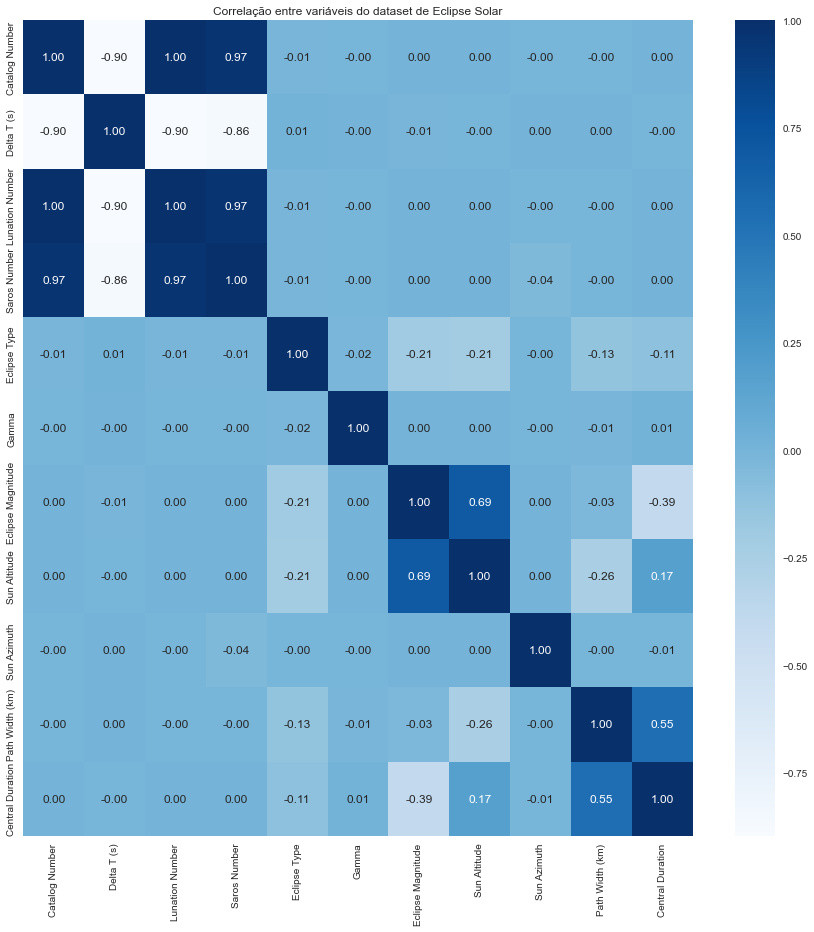

In [143]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    dfSolar.corr(),  # .corr() traz a correlação de Pearson, mostrando um relacionamento linear entre as variáveis
    annot=True,
    fmt=".2f",
    cmap="Blues",
)
plt.title("Correlação entre variáveis do dataset de Eclipse Solar")
plt.show()

In [144]:
dfSolar.drop(
    [
        "Delta T (s)",
        "Gamma",
        "Sun Azimuth",
        "Calendar Date",
        "Eclipse Time",
        "Latitude",
        "Longitude",
        "Path Width (km)",
        "Central Duration",
    ],
    axis=1,
    inplace=True,
)
dfSolar.head()

,Catalog Number,Lunation Number,Saros Number,Eclipse Type,Eclipse Magnitude,Sun Altitude
0,1,-49456,5,1,1.0733,74
1,2,-49450,10,2,0.9382,76
2,3,-49444,15,1,1.0284,60
3,4,-49438,20,2,0.9806,25
4,5,-49433,-13,3,0.1611,0


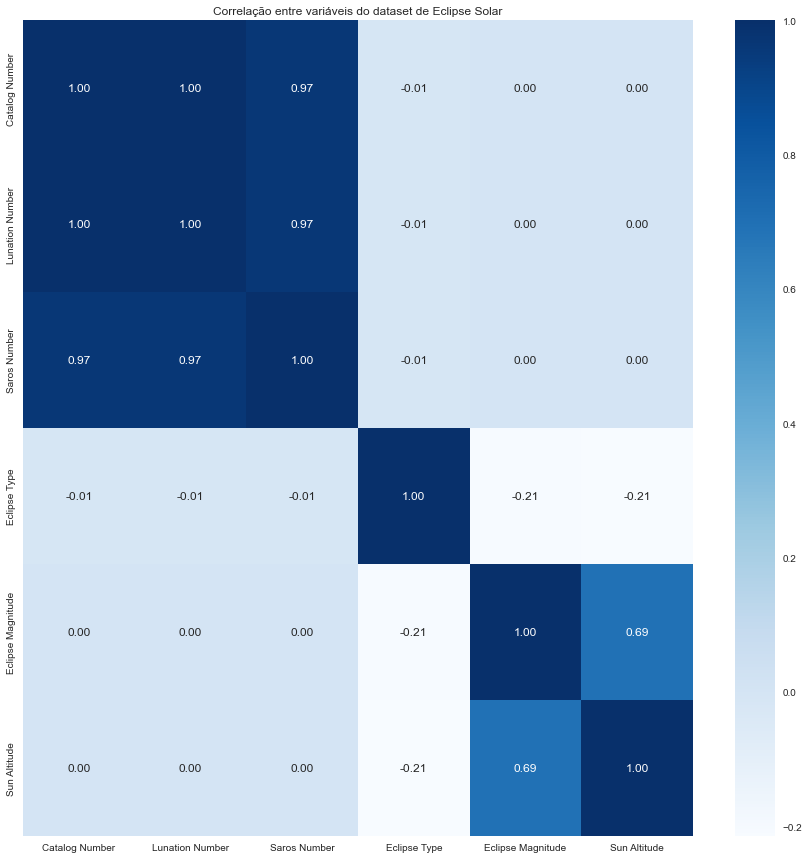

In [145]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    dfSolar.corr(),  # .corr() traz a correlação de Pearson, mostrando um relacionamento linear entre as variáveis
    annot=True,
    fmt=".2f",
    cmap="Blues",
)
plt.title("Correlação entre variáveis do dataset de Eclipse Solar")
plt.show()

# Busca por Outliers

<AxesSubplot:xlabel='Eclipse Type', ylabel='Sun Altitude'>

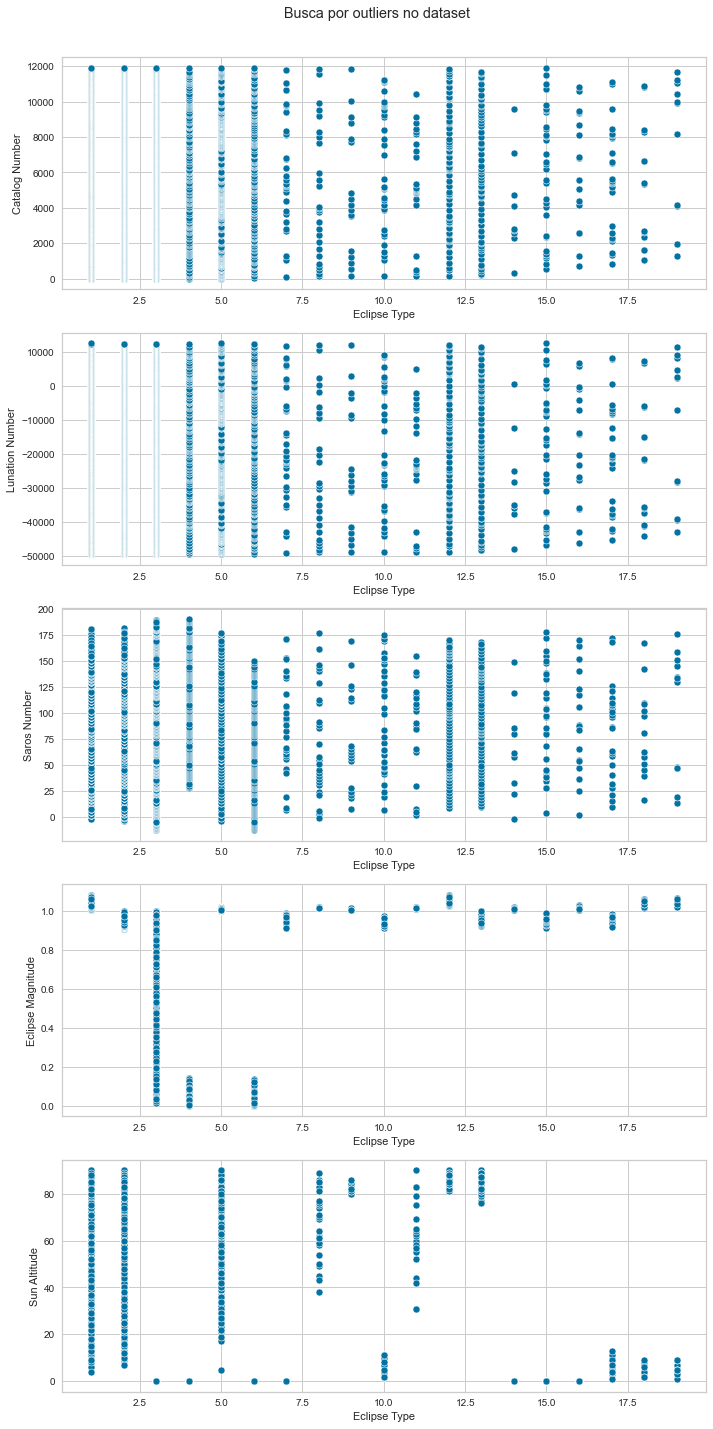

In [146]:
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

fig.suptitle("Busca por outliers no dataset", va="bottom")
fig.tight_layout(pad=2.0)

sns.scatterplot(ax=axes[0], data=dfSolar, x="Eclipse Type", y="Catalog Number")
sns.scatterplot(ax=axes[1], data=dfSolar, x="Eclipse Type", y="Lunation Number")
sns.scatterplot(ax=axes[2], data=dfSolar, x="Eclipse Type", y="Saros Number")
sns.scatterplot(ax=axes[3], data=dfSolar, x="Eclipse Type", y="Eclipse Magnitude")
sns.scatterplot(ax=axes[4], data=dfSolar, x="Eclipse Type", y="Sun Altitude")

# Criação de Modelos de Machine Learning e Análise dos Resultados iniciais

In [147]:
model = GaussianNB()
model2 = KNeighborsClassifier(n_neighbors=10)

In [148]:
dfSolar["Eclipse Type"] = dfSolar.pop("Eclipse Type")
dfSolar.head()

,Catalog Number,Lunation Number,Saros Number,Eclipse Magnitude,Sun Altitude,Eclipse Type
0,1,-49456,5,1.0733,74,1
1,2,-49450,10,0.9382,76,2
2,3,-49444,15,1.0284,60,1
3,4,-49438,20,0.9806,25,2
4,5,-49433,-13,0.1611,0,3


In [149]:
dfSolar2 = dfSolar.drop(["Catalog Number","Saros Number","Lunation Number"], axis=1)
dfSolar2.shape

(11898, 3)

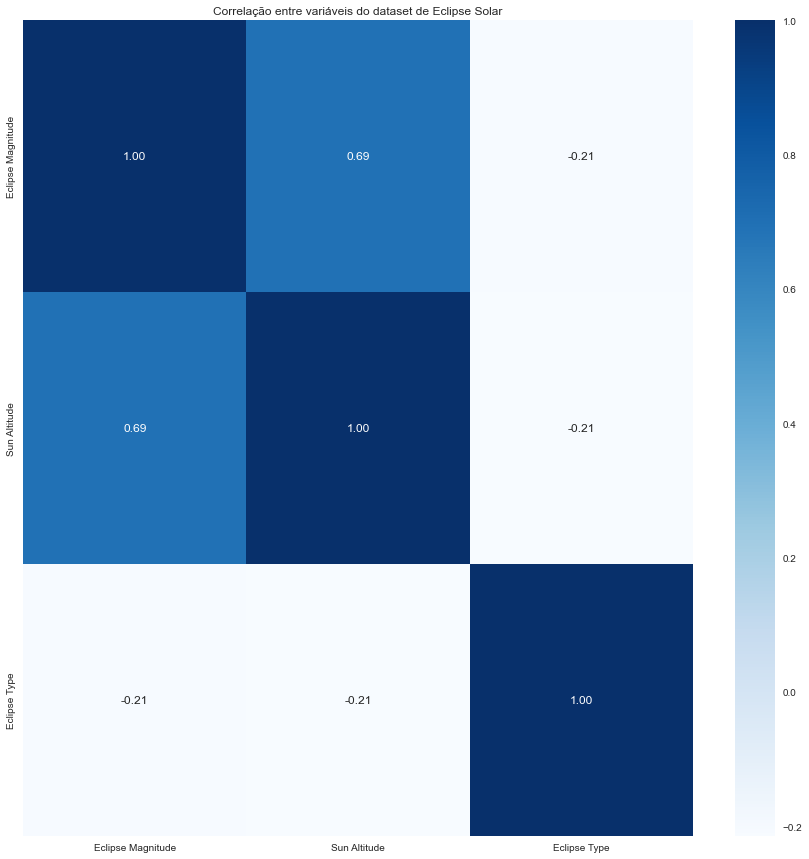

In [150]:
plt.figure(figsize=(15, 15))
sns.heatmap(
    dfSolar2.corr(),  # .corr() traz a correlação de Pearson, mostrando um relacionamento linear entre as variáveis
    annot=True,
    fmt=".2f",
    cmap="Blues",
)
plt.title("Correlação entre variáveis do dataset de Eclipse Solar")
plt.show()

In [151]:
X = dfSolar2.drop(["Eclipse Type"], axis=1)
y = dfSolar2["Eclipse Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [152]:
X_test.head()

,Eclipse Magnitude,Sun Altitude
9512,0.9962,78
2174,1.0335,81
10288,0.2383,0
4860,1.0130,52
2316,0.0469,0


In [153]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9333333333333333

In [154]:
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

0.915126050420168

# Análise com Pycaret em busca do melhor modelo possível para o Eclipse Lunar

In [155]:
s = setup(dfSolar2, target="Eclipse Type", remove_perfect_collinearity=False)

,Description,Value
0,session_id,6356
1,Target,Eclipse Type
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(11898, 3)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [156]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9384,0.4960,0.4969,0.9330,0.9349,0.9151,0.9152,0.1110
nb,Naive Bayes,0.9378,0.4990,0.3495,0.9151,0.9239,0.9136,0.9140,0.0050
dt,Decision Tree Classifier,0.9358,0.4811,0.5083,0.9335,0.9339,0.9115,0.9116,0.0050
et,Extra Trees Classifier,0.9338,0.4898,0.4788,0.9281,0.9301,0.9088,0.9089,0.0810
knn,K Neighbors Classifier,0.9260,0.4926,0.3531,0.9042,0.9136,0.8970,0.8974,0.0140
ada,Ada Boost Classifier,0.9024,0.4841,0.2605,0.8511,0.8609,0.8610,0.8654,0.0850
lr,Logistic Regression,0.8963,0.4948,0.1960,0.8101,0.8508,0.8519,0.8559,1.8870
gbc,Gradient Boosting Classifier,0.8707,0.4580,0.3969,0.8745,0.8658,0.8433,0.8567,2.3090
lda,Linear Discriminant Analysis,0.7470,0.4795,0.1840,0.7627,0.7142,0.6422,0.6727,0.0060
lightgbm,Light Gradient Boosting Machine,0.6802,0.3929,0.1516,0.7430,0.6717,0.5631,0.5882,0.2070


In [157]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

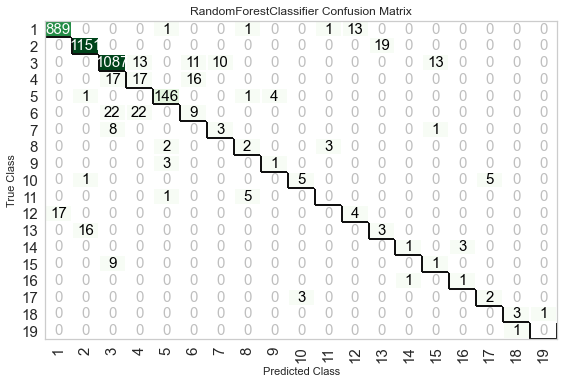

In [158]:
plot_model(best, plot="confusion_matrix")

In [159]:
predictions = predict_model(best, data=dfSolar2, raw_score=True)
predictions.head()

,Eclipse Magnitude,Sun Altitude,Eclipse Type,Label,Score_0,Score_1,Score_2,Score_3,Score_4,Score_5,...,Score_9,Score_10,Score_11,Score_12,Score_13,Score_14,Score_15,Score_16,Score_17,Score_18
0,1.0733,74,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.9382,76,2,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0284,60,1,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.9806,25,2,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1611,0,3,3,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
print("Score do melhor modelo encontrado:", best.score(X_test, y_test))
y_pred = best.predict(X_test)
print(classification_report(y_test, y_pred))

Score do melhor modelo encontrado: 0.9736694677871148
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       910
           2       1.00      1.00      1.00      1099
           3       0.98      0.98      0.98      1188
           4       0.68      0.56      0.61        45
           5       0.99      0.99      0.99       150
           6       0.69      0.68      0.68        56
           7       0.57      0.73      0.64        11
           8       0.75      0.75      0.75         8
           9       0.60      1.00      0.75         3
          10       0.91      0.91      0.91        11
          11       0.80      0.80      0.80        10
          12       0.77      0.71      0.74        24
          13       0.80      0.76      0.78        21
          14       1.00      1.00      1.00         3
          15       0.64      0.64      0.64        11
          16       1.00      1.00      1.00         4
          17       0.86    

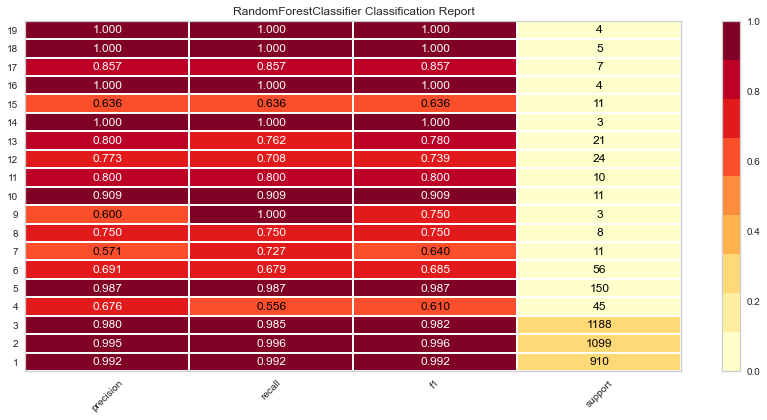

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [161]:
visualizer = ClassificationReport(
    best,
    classes=[
        "0",
        "1",
        "2",
        "3",
        "4",
        "5",
        "6",
        "7",
        "8",
        "9",
        "10",
        "11",
        "12",
        "13",
        "14",
        "15",
        "16",
        "17",
        "18",
        "19",
    ],
    support=True,
)
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("Sine and cosine waves")
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)


visualizer.show()

# Validação Cruzada

In [163]:
scores = cross_val_score(model, X, y, cv=10)  # variável com número de validações cv

print("Scores obitidos:", scores)
print("Média de Score:", scores.mean())

Scores obitidos: [0.93277311 0.94537815 0.93445378 0.93277311 0.9487395  0.93613445
 0.93697479 0.92352941 0.93860387 0.93776283]
Média de Score: 0.9367122997222438


In [164]:
scores = cross_val_score(best, X, y, cv=10)  # variável com número de validações cv

print("Scores obitidos:", scores)
print("Média de Score:", scores.mean())

Scores obitidos: [0.93445378 0.94705882 0.92773109 0.92521008 0.94033613 0.94621849
 0.93445378 0.92521008 0.93944491 0.93187553]
Média de Score: 0.9351992706249866


# Conclusão para o modelo de Eclipses Solares

Para o modelo de classificação Solar, fiz as mesmas verificações na exploração e pré-processamento de dados: Busca por Valores nulos em algum lugar do DataFrame, dados não normalizados, dados uplicados, Variáveis categóricas, correlação baixa entre os dados e outliers. 

Como no modelo anterior foi evidenciado que as conversões de dados String -> Float e String -> DateTime não tinham uma correlação boa com os dados, aqui já os descartei de imediato

Sabendo que o problema era de classificação, explorei os modelos KNN e Naive Bayer, sem uso de hiperparâmetros neles, definido o número de K-vizinhos como 5 também. O algoritmo Naive Bayer teve um score de 0.933, enquanto o KNN 0.915.

Em estudos passados sobre Machine Learning, vi que alguns estavam usando uma biblioteca chamada PyCaret e fui atrás da documentação dela pra implementar aqui. Se trata de uma biblioteca que automatiza testes com diversos modelos e encontra o melhor com seus hiperparâmetros já definidos em pouco tempo(Para este dataset, questão de 10seg mais ou menos), meu objetivo aqui no caso seria tentar subir ainda mais o score, utilizando outros algoritmos. De todos os analisados pela biblioteca, foi retornado o Random Forest Classifier como sendo o de maior score, plotei sua Matriz de confusão e o Report de Classificação para ver se não estava dando nenhum caso de Overfitting e aparentemente ficou estável, tendo um score final de 0.973.

Por fim, adotei o método de validação cruzada, usando 10 iterações para ser um pouco mais rigoroso com os dados e comparando tanto o KNN que fiz sua implementação manualmente quanto a sugestão do PyCaret, onde foi obtido o resultado de que o algoritmo do PyCaret se saiu ligeiramente menos eficiente nos resultados, tendo uma média de Score em 0.9351, enquanto o KNN teve 0.9367, cerca de 0.0016 de diferença apenas no score obtido.